## 常见的图形及使用场景

* pie 饼图 适合少量分类变量取值对比
* bar 条形图 饼图不适合取值过多的分类特征，条形图不仅适合分类较多的变量，也适合对比差异
* barh 水平条形图
* hist 直方图 展示连续性数据的分布状态
* scatter 散点图 一般用来展示2个连续性变量的关系，如线性或非线性

In [27]:
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np

## 饼图
适合展示分类变量之间的量对比

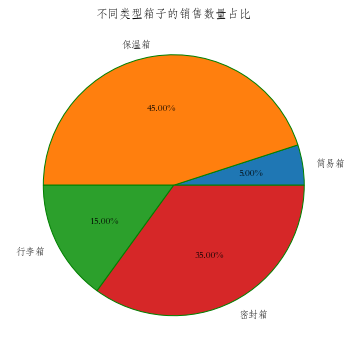

In [4]:
plt.figure(figsize=(6, 6))
kinds = ['简易箱','保温箱','行李箱','密封箱']
soldNums = [0.05,0.45,0.15,0.35]
explodes = [0,0,0,0]
plt.axes(aspect='equal') # 绘制出来的是正圆形
plt.pie(x=soldNums, labels=kinds, explode=explodes, autopct ='%.2f%%',
        wedgeprops= { 'linewidth' : 1.0 , 'edgecolor' : 'green'},
        startangle=0) #设置百分比格式
plt.title('不同类型箱子的销售数量占比')
plt.show()

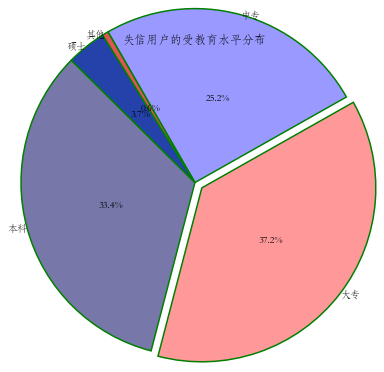

In [6]:
# 添加修饰的饼图
# 构造数据
edu = [0.2515,0.3724,0.3336,0.0368,0.0057]
labels = ['中专','大专','本科','硕士','其他']
explode = [0,0.1,0,0,0]  # 生成数据，用于突出显示大专学历人群
colors=['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555']  # 自定义颜色
# 将横、纵坐标轴标准化处理，确保饼图是一个正圆，否则为椭圆
plt.axes(aspect='equal')
# 绘制饼图
plt.pie(x = edu, # 绘图数据
        explode=explode, # 突出显示大专人群
        labels=labels, # 添加教育水平标签
        colors=colors, # 设置饼图的自定义填充色
        autopct='%.1f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.5,  # 设置百分比标签与圆心的距离
        labeldistance = 1.0, # 设置教育水平标签与圆心的距离
        startangle = 120, # 设置饼图的初始角度
        radius = 2, # 设置饼图的半径
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':10, 'color':'black'}, # 设置文本标签的属性值
        )
# 添加图标题
plt.title('失信用户的受教育水平分布',pad =30)
# 显示图形
plt.show()

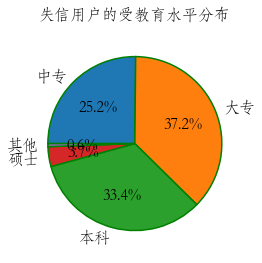

In [9]:
# # # 使用pandas
# 导入第三方模块
# 构建序列
data1 = pd.Series({'中专':0.2515,'大专':0.3724,'本科':0.3336,'硕士':0.0368,'其他':0.0057})
# 将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data1.name = ''
# 控制饼图为正圆
plt.axes(aspect = 'equal')
# plot方法对序列进行绘图
data1.plot(kind = 'pie', # 选择图形类型
           autopct='%.1f%%', # 饼图中添加数值标签
           radius = 1, # 设置饼图的半径
           startangle = 180, # 设置饼图的初始角度
           counterclock = False, # 将饼图的顺序设置为顺时针方向
           title = '失信用户的受教育水平分布', # 为饼图添加标题
           wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'}, # 设置饼图内外边界的属性值
           textprops = {'fontsize':16, 'color':'black'} # 设置文本标签的属性值
          )
# 显示图形
plt.title('失信用户的受教育水平分布',fontsize=16,pad =15)
# fontsize 控制文本字体大小,pad控制距离
plt.show()

## 条形图

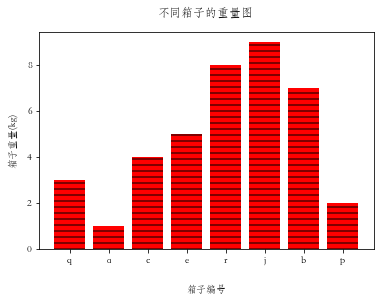

In [2]:
# # # # # # 条形图
# 绘制垂直条形图
# 创建简单数据
x =[1,2,3,4,5,6,7,8]
y =[3,1,4,5,8,9,7,2]
labels = ['q','a','c','e','r','j','b','p']
plt.bar(x,y,align='center',color='r',tick_label=labels, hatch='--')
plt.xlabel('箱子编号',labelpad =19)  # 控制标签和坐标轴的距离
plt.ylabel('箱子重量(kg)',labelpad =10)
plt.title('不同箱子的重量图',pad=15)
plt.show()

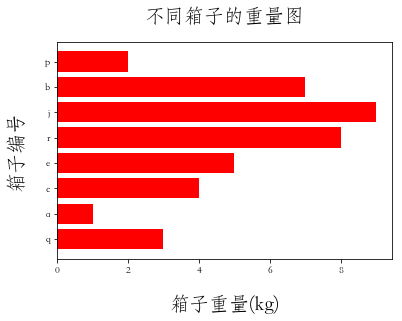

In [11]:
# 绘制水平条形图
# 创建简单数据
x =[1,2,3,4,5,6,7,8]
y =[3,1,4,5,8,9,7,2]
labels = ['q','a','c','e','r','j','b','p']
plt.barh(x,y,align='center',color='r',tick_label=labels)
plt.xlabel('箱子重量(kg)',fontsize=20,labelpad =19)
plt.ylabel('箱子编号',fontsize=20,labelpad =19)
plt.title('不同箱子的重量图',fontsize=20,pad =19)
plt.show()

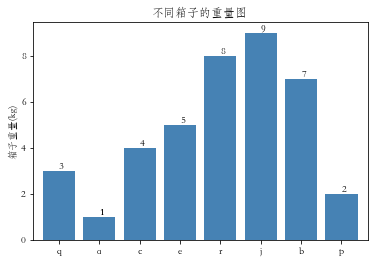

In [12]:
#使用pandas绘图
x = ['q','a','c','e','r','j','b','p']
y =[3,1,4,5,8,9,7,2]
df = pd.DataFrame({'x':x,'y':y},index = range(1,9))
df.y.plot(kind = 'bar', width = 0.8, rot = 0, color = 'steelblue', title = '不同箱子的重量图')
# 添加y轴标签
plt.ylabel('箱子重量(kg)')
# 添加x轴刻度标签
plt.xticks(range(len(df.x)), #指定刻度标签的位置
          df.x) # 指出具体的刻度标签值
# 为每个条形图添加数值标签
plt.text(1,1.2,'%s' % round(1,1),va='center')
for i,j in enumerate(df.y):
    plt.text(i,j+0.2,'%s' % round(j,1) ,va='center')
# 显示图形
plt.show()

## 直方图

In [17]:
#读取数据
Titanic = pd.read_csv('titanic_train.csv')
Titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [12]:
#检查年龄是否有缺失
any(Titanic['Age'].isnull())

True

In [13]:
Titanic.shape

(891, 12)

In [19]:
# 删除缺失值
Titanic['Age'].dropna(inplace=True)

In [15]:
Titanic.shape

(891, 12)

In [16]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.2+ KB


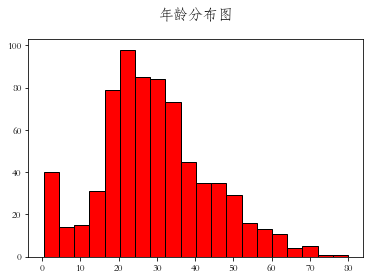

In [21]:
#绘制直方图
# bins 指定直方图的条数
plt.hist(x =Titanic.Age,bins=20,color='r',edgecolor='black', rwidth=2)
# plt.xlabel('年龄',fontsize =15,labelpad =20)
# plt.ylabel('频数',fontsize =15,labelpad =20)
plt.title('年龄分布图',fontsize =15,pad =20)
plt.show()

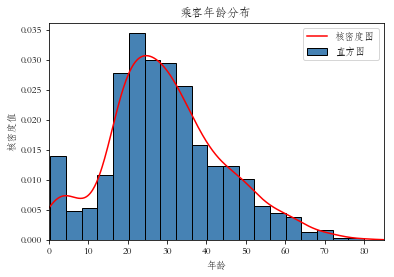

In [22]:
# 使用pandas绘图
Titanic.Age.plot(kind = 'hist', bins = 20, color = 'steelblue', edgecolor = 'black', label = '直方图',density = True)
# 绘制核密度图
Titanic.Age.plot(kind = 'density', color = 'red',label = '核密度图',xlim=[0,Titanic.Age.max()+5])
# 添加x轴和y轴标签
plt.xlabel('年龄')
plt.ylabel('核密度值')
# 添加标题
plt.title('乘客年龄分布')
# 显示图例
plt.legend()
# 显示图形
plt.show()

## 散点图

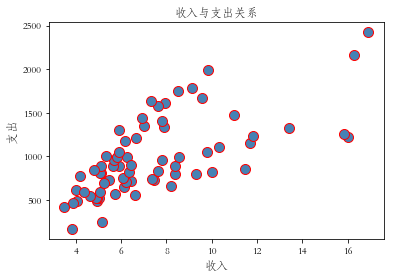

In [23]:

# 读取数据
creditcard_exp  = pd.read_csv('creditcard_exp.csv',skipinitialspace = True)
creditcard_exp.dropna(subset=['Income','avg_exp'],inplace=True)
# 画图
plt.scatter(x = creditcard_exp.Income,y=creditcard_exp.avg_exp,color= 'steelblue',marker='o',
            s=100,edgecolors='red')
plt.xlabel('收入',fontsize=12) # 坐标轴标签大小
plt.ylabel('支出',fontsize=12)
plt.title('收入与支出关系')
plt.show()

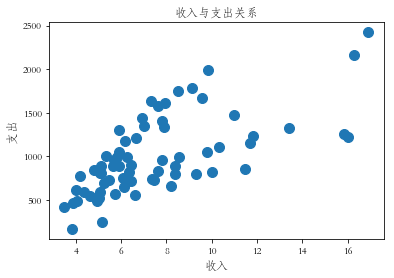

In [24]:
#pandas模块
creditcard_exp.plot(x= 'Income',y='avg_exp',kind='scatter',marker='o',s=100,title='收入与支出散点图')
plt.xlabel('收入',fontsize=12) #坐标轴标签大小
plt.ylabel('支出',fontsize=12)
plt.title('收入与支出关系')
plt.show()


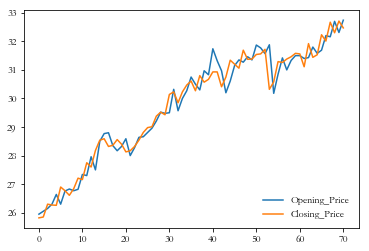

In [25]:
#==============================================================================
# 2.2 图形设置
#==============================================================================
# # # # # # 图例用法
pd.set_option('display.max_columns',8)
jd_stock  = pd.read_csv('data.csv', sep =',',header=None,names =['name','date','opening_price','closing_price',
                                                                 'lowest_price','highest_price','volume'])
jd_stock['date'] = pd.to_datetime(jd_stock['date'])
plt.plot(jd_stock['opening_price'],label='Opening_Price')
plt.plot(jd_stock['closing_price'],label='Closing_Price')
plt.legend(loc='lower right', frameon=False) #控制是否有边框
plt.show()

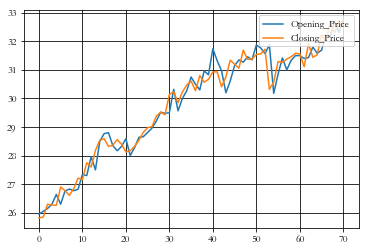

In [26]:
# # # # # # 绘制网格线
# plt.grid(ls,c), ls=线条风格,c线条颜色
plt.plot(jd_stock['opening_price'],label='Opening_Price')
plt.plot(jd_stock['closing_price'],label='Closing_Price')
plt.legend(loc='upper right',frameon = True)
plt.grid(ls='-',c = 'black')
plt.show()

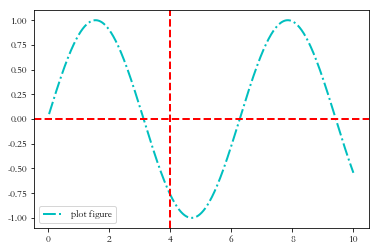

In [28]:
# # # # # # 绘制平行于x轴和y轴的水平参考线
# plt.axhline(y,c,ls,lw)
x = np.linspace(0.05,10,1000)
y = np.sin(x)
plt.plot(x,y,ls='-.',lw=2,c='c',label='plot figure')
plt.legend()
plt.axhline(y = 0,c = 'r',ls = '--',lw = 2)
plt.axvline(x = 4,c = 'r',ls = '--',lw = 2)
plt.show()

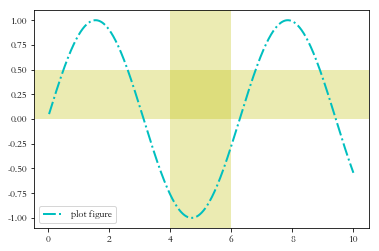

In [29]:
# # # # # # 绘制平行于x轴和y轴的参考区域
# plt.axvspan(xmin,xmax,faceclor,alpha)
x = np.linspace(0.05,10,1000)
y = np.sin(x)
plt.plot(x,y,ls='-.',lw=2,c='c',label='plot figure')
plt.legend()
plt.axvspan(xmin=4,xmax=6,  facecolor='y', alpha=0.3)
plt.axhspan(ymin=0,ymax=0.5,facecolor='y',alpha=0.3)
plt.show()

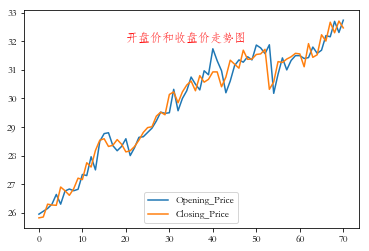

In [30]:
# # # # # # 添加图形内容,无指向
# plt.text(x,y,string,weight,color)
# weight --文本风格粗细风格
plt.plot(jd_stock['opening_price'],label='Opening_Price')
plt.plot(jd_stock['closing_price'],label='Closing_Price')
plt.legend(loc='lower center',frameon = True)
plt.text(20,32,'开盘价和收盘价走势图',weight ='bold',color='red',fontsize=12)
plt.show()

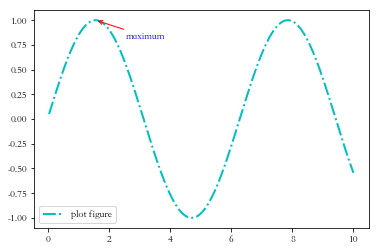

In [31]:
# # # # # # 添加图形内容细节的指向型注解
x = np.linspace(0.05,10,1000)
y = np.sin(x)
plt.plot(x,y,ls='-.',lw=2,c='c',label='plot figure')
plt.legend()
plt.annotate('maximum',xy=(np.pi/2,1), xytext=((np.pi/2)+1,0.8),weight='bold',color='b',
             arrowprops =dict(arrowstyle='->',connectionstyle = 'arc3',color='r'))
plt.show()

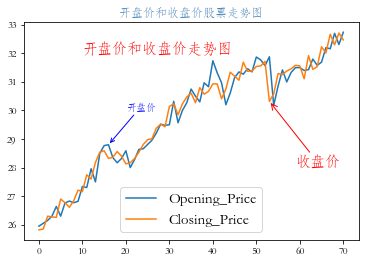

In [32]:
# # # #用于之前的数据
plt.plot(jd_stock['opening_price'],label='Opening_Price')
plt.plot(jd_stock['closing_price'],label='Closing_Price')
plt.legend(loc='lower center',frameon = True,fontsize =15)
plt.annotate('开盘价',xy=(16,28.80), xytext=(20,30),weight='bold',color='b',
             arrowprops =dict(arrowstyle='->',connectionstyle = 'arc3',color='b'))
plt.annotate('收盘价',xy=(53,30.32), xytext=(59,28),weight='bold',color='r', fontsize = 15,
             arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3',color='r'))
plt.text(10,32,'开盘价和收盘价走势图',weight ='bold',color='red',fontsize=15)
plt.title('开盘价和收盘价股票走势图',color ='steelblue')
plt.show()